In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [6]:
dataset = sns.load_dataset("diamonds")

In [7]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
data = dataset.drop(['depth','cut','clarity','color','table','x','y','z'],axis=1)    

In [10]:
data

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [11]:
x = data.iloc[:,-1].values.reshape(-1,1)
y = data.iloc[:,0].values.reshape(-1,1)

In [12]:
x

array([[ 326],
       [ 326],
       [ 327],
       ...,
       [2757],
       [2757],
       [2757]], dtype=int64)

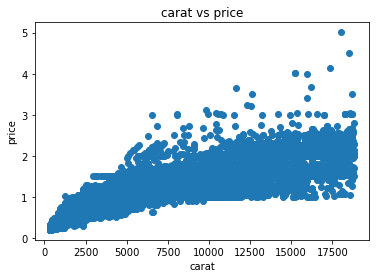

In [14]:
plt.scatter(x,y)
plt.title('carat vs price')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
x_train.shape

(43152, 1)

In [18]:
x_test.shape

(10788, 1)

In [19]:
y_train.shape

(43152, 1)

In [20]:
y_test.shape

(10788, 1)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=lm.predict(x_test)

In [25]:
y_pred

array([[0.88577842],
       [1.07108791],
       [0.97092655],
       ...,
       [0.78868546],
       [1.26220545],
       [0.57718497]])

In [26]:
check=pd.DataFrame(x_test,columns=['diamond'])

In [27]:
check['Actual price']=y_test

In [29]:
check['Predicted price'] = y_pred

In [30]:
check

,diamond,Actual price,Predicted price
0,1.10,1.10,0.885778
1,1.29,1.29,1.071088
2,1.20,1.20,0.970927
3,1.50,1.50,1.328176
4,0.90,0.90,0.859478
...,...,...,...
10783,0.52,0.52,0.508365
10784,0.91,0.91,0.743536
10785,1.08,1.08,0.788685
10786,1.02,1.02,1.262205


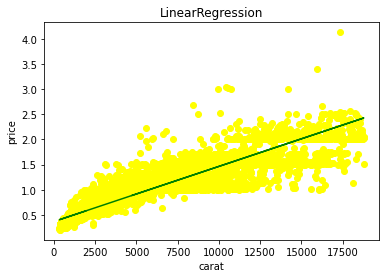

In [33]:
plt.scatter(x_test,y_test,color='yellow')
plt.plot(x_test,y_pred,color='green')
plt.title('LinearRegression')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [35]:
mean_squared_error(y_test,y_pred)

0.03291100967224181

In [36]:
mean_absolute_error(y_test,y_pred)

0.13359100700724855

In [37]:
r2_score(y_test,y_pred)

0.8516065939452341